In [1]:
#مریم سلطانی 400126134#
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [2]:
import pandas as pd
import io
dataset = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))

In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
y=y.reshape(-1, 1)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
y=sc.fit_transform(y)


from sklearn.preprocessing import  LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


df = pd.DataFrame(dataset, columns = ['age','sex','bmi','children','smoker','region','charges'])
df
y
    

array([[ 0.2985838 ],
       [-0.95368917],
       [-0.72867467],
       ...,
       [-0.96159623],
       [-0.93036151],
       [ 1.31105347]])

In [6]:
d = {'female': 1, 'male': 0}
df['sex'] = df['sex'].map(d)

d = {'yes': 1, 'no': 0}
df['smoker'] = df['smoker'].map(d)

d = {'southwest': 1, 'southeast': 2, 'northeast': 3, 'northwest': 4}
df['region'] = df['region'].map(d)
#df_sex = pd.get_dummies(df['sex'])
#df_new = pd.concat([df, df_sex], axis=1)
df_new=df

In [46]:
#df_sex = pd.get_dummies(df_new['region'])
#df_new = pd.concat([df_new, df_sex], axis=1)
#df_new


In [7]:
#df_smoker = pd.get_dummies(df_new['smoker'])
#df_new = pd.concat([df_new, df_smoker], axis=1)
df_new

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,4,21984.47061
4,32,0,28.880,0,0,4,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,4,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


Coefficients(coeff):  [[0.32157214]]
Coefficients(intercept):  [0.03436806]
Mean squared error: 0.91
RMSE: 0.95
MAE: 0.76
r2_score: 0.08


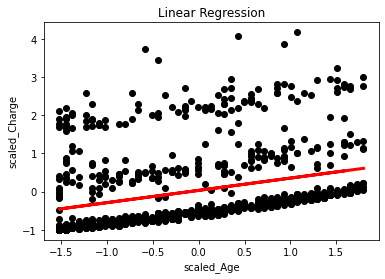

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

#linear regression for age
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Use only one feature
df_newage=df_new.iloc[:, 0]
df_newagee=df_newage.values.reshape(-1, 1)


# Split the data into training/testing sets
df_newagee_train = df_newagee[:-936]
df_newagee_train=sc.fit_transform(df_newagee_train)

df_newagee_test = df_newagee[-936:]
df_newagee_test=sc.fit_transform(df_newagee_test)

# Split the targets into training/testing sets
y_train = y[:-936]
y_test = y[-936:]


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_newagee_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(df_newagee_test)

# The coefficients
print("Coefficients(coeff): ", regr.coef_)
print("Coefficients(intercept): ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# the RMSE
print("RMSE: %.2f" %  mean_squared_error(y_test, y_pred, squared=False))
# MAE
print("MAE: %.2f"%  mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2_score: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(df_newagee_test, y_test, color="black")
plt.plot(df_newagee_test, y_pred, color="red", linewidth=3)

#plt.xticks(())
#plt.yticks(())
plt.title('Linear Regression')
plt.xlabel('scaled_Age')
plt.ylabel('scaled_Charge')
plt.show()



Coefficients(coeff):  [[0.18643257]]
Coefficients(intercept):  [0.03436806]
Mean squared error: 0.95
RMSE: 0.97
MAE: 0.76
r2_score: 0.04


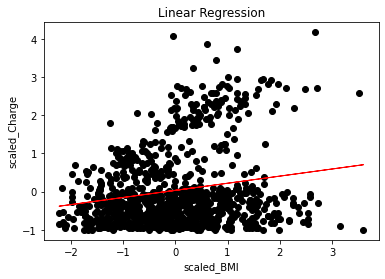

In [28]:
#linear regression for BMI
# Use only one feature
df_newBMI=df_new.iloc[:, 2]
df_newbmi=df_newBMI.values.reshape(-1, 1)


# Split the data into training/testing sets
df_newbmi_train = df_newbmi[:-936]
df_newbmi_train=sc.fit_transform(df_newbmi_train)

df_newbmi_test = df_newbmi[-936:]
df_newbmi_test=sc.fit_transform(df_newbmi_test)

# Split the targets into training/testing sets
y_train = y[:-936]
y_test = y[-936:]


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_newbmi_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(df_newbmi_test)

# The coefficients
print("Coefficients(coeff): ", regr.coef_)
print("Coefficients(intercept): ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# the RMSE
print("RMSE: %.2f" %  mean_squared_error(y_test, y_pred, squared=False))
# MAE
print("MAE: %.2f"%  mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2_score: %.2f" % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(df_newbmi_test, y_test, color="black")
plt.plot(df_newbmi_test, y_pred, color="red", linewidth=1)

plt.title('Linear Regression')
plt.xlabel('scaled_BMI')
plt.ylabel('scaled_Charge')
plt.show()


Coefficients(coeff):  [[0.0633554]]
Coefficients(intercept):  [0.03436806]
Mean squared error: 0.99
RMSE: 0.99
MAE: 0.76
r2_score: 0.00


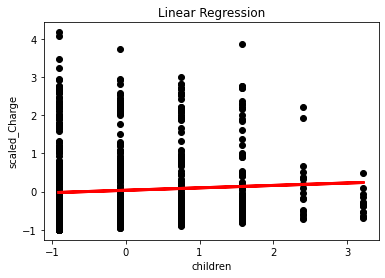

In [24]:
#linear regression for children
# Use only one feature
df_newCHILD=df_new.iloc[:, 3]
df_newchil=df_newCHILD.values.reshape(-1, 1)

# Split the data into training/testing sets
df_newchil_train = df_newchil[:-936]
df_newchil_train=sc.fit_transform(df_newchil_train)

df_newchil_test = df_newchil[-936:]
df_newchil_test=sc.fit_transform(df_newchil_test)

# Split the targets into training/testing sets
y_train = y[:-936]
y_test = y[-936:]


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_newchil_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(df_newchil_test)
# The coefficients
print("Coefficients(coeff): ", regr.coef_)
print("Coefficients(intercept): ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# the RMSE
print("RMSE: %.2f" %  mean_squared_error(y_test, y_pred, squared=False))
# MAE
print("MAE: %.2f"%  mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2_score: %.2f" % r2_score(y_test, y_pred))


# Plot outputs
plt.scatter(df_newchil_test, y_test, color="black")
plt.plot(df_newchil_test, y_pred, color="red", linewidth=3)

plt.title('Linear Regression')
plt.xlabel('children')
plt.ylabel('scaled_Charge')
plt.show()

Coefficients(coeff):  [[-0.2374068]]
Coefficients(intercept):  [0.1524809]
Mean squared error: 1.00
RMSE: 1.00
MAE: 0.76
r2_score: -0.01


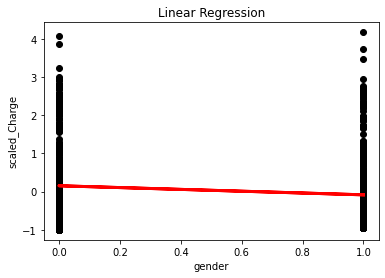

In [25]:
#gender col1
#from statsmodels.formula.api import ols
#from scipy import stats
#import statsmodels.api as sm
#df_new.drop(["sex","male"], inplace=True, axis=1)
#df_new
#reg=ols("charges~gender",df_new).fit()
#reg.summary()

#linear regression for gender
# Use only one feature
df_newGEN=df_new.iloc[:, 1]
df_newgen=df_newGEN.values.reshape(-1, 1)

# Split the data into training/testing sets
df_newgen_train = df_newgen[:-936]
#df_newgen_train=sc.fit_transform(df_newgen_train)

df_newgen_test = df_newgen[-936:]
#df_newgen_test=sc.fit_transform(df_newgen_test)

# Split the targets into training/testing sets
y_train = y[:-936]
y_test = y[-936:]


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_newgen_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(df_newgen_test)



# The coefficients
print("Coefficients(coeff): ", regr.coef_)
print("Coefficients(intercept): ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# the RMSE
print("RMSE: %.2f" %  mean_squared_error(y_test, y_pred, squared=False))
# MAE
print("MAE: %.2f"%  mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2_score: %.2f" % r2_score(y_test, y_pred))
# Plot outputs
plt.scatter(df_newgen_test, y_test, color="black")
plt.plot(df_newgen_test, y_pred, color="red", linewidth=3)

plt.title('Linear Regression')
plt.xlabel('gender')
plt.ylabel('scaled_Charge')
plt.show()

Coefficients(coeff):  [[-0.02805041]]
Coefficients(intercept):  [0.10470343]
Mean squared error: 0.99
RMSE: 1.00
MAE: 0.76
r2_score: -0.003


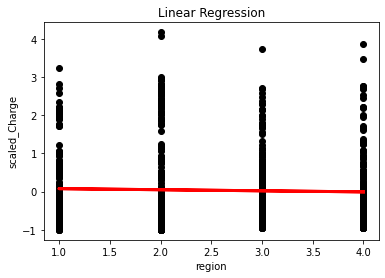

In [27]:

#linear regression for region
# Use only one feature
df_newRegion=df_new.iloc[:, 5]
df_newregi=df_newRegion.values.reshape(-1, 1)

# Split the data into training/testing sets
df_newregi_train = df_newregi[:-936]
#df_newgen_train=sc.fit_transform(df_newgen_train)

df_newregi_test = df_newregi[-936:]
#df_newgen_test=sc.fit_transform(df_newgen_test)

# Split the targets into training/testing sets
y_train = y[:-936]
y_test = y[-936:]


regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df_newregi_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(df_newregi_test)

# The coefficients
# The coefficients
print("Coefficients(coeff): ", regr.coef_)
print("Coefficients(intercept): ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# the RMSE
print("RMSE: %.2f" %  mean_squared_error(y_test, y_pred, squared=False))
# MAE
print("MAE: %.2f"%  mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2_score: %.3f" % r2_score(y_test, y_pred))
# Plot outputs
plt.scatter(df_newregi_test, y_test, color="black")
plt.plot(df_newregi_test, y_pred, color="red", linewidth=3)

plt.title('Linear Regression')
plt.xlabel('region')
plt.ylabel('scaled_Charge')
plt.show()